In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
import spacy
nlp = spacy.load("en_core_web_sm")
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [12]:
stop_words = nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
df = pd.read_csv(r'/content/IMDB_Top250Engmovies2_OMDB_Detailed.csv')

In [25]:
cols = ['tomatoMeter', 'tomatoImage',
       'tomatoRating', 'tomatoReviews', 'tomatoFresh', 'tomatoRotten',
       'tomatoConsensus', 'tomatoUserMeter', 'tomatoUserRating',
       'tomatoUserReviews','Unnamed: 0','Type','Response','imdbID','tomatoURL','Metascore',
       'Ratings.Source','Poster',
        'Released','Website','DVD','Runtime','Ratings.Value']
df.drop(cols,axis=1,inplace=True)

In [26]:
df.head()

,Title,Year,Rated,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,imdbRating,imdbVotes,BoxOffice,Production
0,The Shawshank Redemption,1994,R,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 19 wins & 30 n...,9.3,"1,825,626",NaN,Columbia Pictures
1,The Godfather,1972,R,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 23 wins & 27 nominations.,9.2,"1,243,444",NaN,Paramount Pictures
2,The Godfather: Part II,1974,R,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 10 wins & 20 nominations.,9.0,"856,870",NaN,Paramount Pictures
3,The Dark Knight,2008,PG-13,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker emerges fro...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 151 wins & 153 nominations.,9.0,"1,802,351","$533,316,061",Warner Bros. Pictures/Legendary
4,12 Angry Men,1957,APPROVED,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,English,USA,Nominated for 3 Oscars. Another 16 wins & 8 no...,8.9,"494,215",NaN,Criterion Collection


In [27]:
df["Writer"] = df["Writer"].str.replace("(","")
df["Writer"] = df["Writer"].str.replace(")","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [28]:
df.isnull().sum()

Title           0
Year            0
Rated           0
Genre           0
Director        0
Writer          1
Actors          0
Plot            0
Language        0
Country         0
Awards          5
imdbRating      0
imdbVotes       0
BoxOffice     175
Production      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


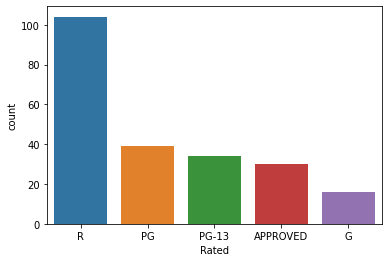

In [29]:
sns.countplot(df.Rated, order=df.Rated.value_counts().iloc[:5].index)

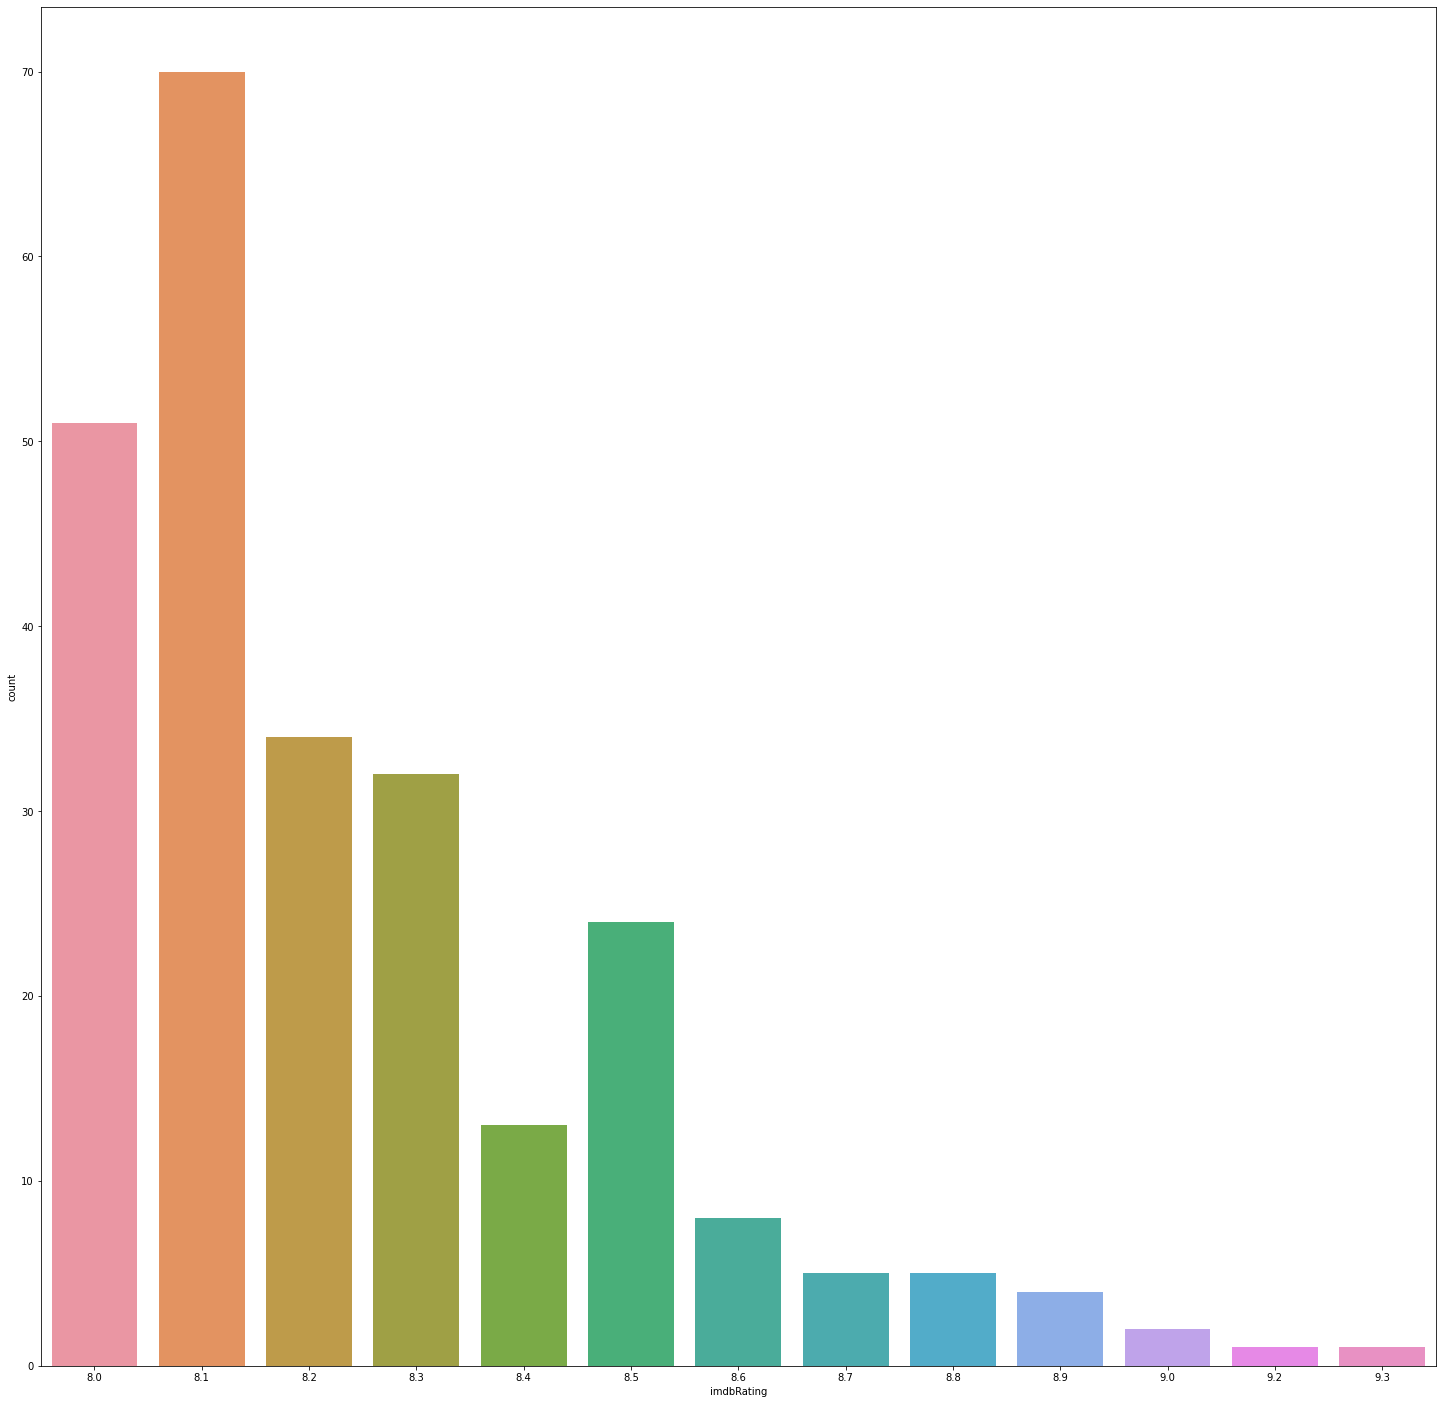

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
sns.countplot(data = df, x = "imdbRating" )

In [31]:
#print(nlp.Defaults.stop_words)
def preprocessing(tweet):
#     x=' '.join(filter(lambda x:x[0] not in ('@'), tweet.split()))
#     x=re.sub(r"http\S+", " ", x)
#     x=re.sub('[^a-zA-Z]+',' ',x)
    x=tweet.lower()
    x=x.split()
    x=[i for i in x if i not in punctuation]
    x=[i for i in x if i not in stopwords]  
    x=nlp(' '.join(x))
    x=[words.lemma_ for words in x]
    x=' '.join(x)
    return x
df['Plot']=df['Plot'].apply(preprocessing)

In [32]:
for i in df.columns:
    df[i] = df[i].astype(str)
    df[i] = df[i].str.lower()

In [33]:
df['Plot'].head()

0    imprison man bond number year , find solace ev...
1    age patriarch organize crime dynasty transfer ...
2    early life career vito corleone 1920s new york...
3    menace know joker emerge mysterious past , wre...
4    jury holdout attempt prevent miscarriage justi...
Name: Plot, dtype: object

In [34]:
df["descriptor"] = ""
def merger(x):
    for i in x.columns:
        df["descriptor"] += df[i]+" " 
        
    return df["descriptor"]
merger(df.drop("Title",axis=1))
df.head()

,Title,Year,Rated,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,imdbRating,imdbVotes,BoxOffice,Production,descriptor
0,the shawshank redemption,1994,r,"crime, drama",frank darabont,"stephen king short story ""rita hayworth and sh...","tim robbins, morgan freeman, bob gunton, willi...","imprison man bond number year , find solace ev...",english,usa,nominated for 7 oscars. another 19 wins & 30 n...,9.3,"1,825,626",nan,columbia pictures,"1994 r crime, drama frank darabont stephen kin..."
1,the godfather,1972,r,"crime, drama",francis ford coppola,"mario puzo screenplay, francis ford coppola sc...","marlon brando, al pacino, james caan, richard ...",age patriarch organize crime dynasty transfer ...,"english, italian, latin",usa,won 3 oscars. another 23 wins & 27 nominations.,9.2,"1,243,444",nan,paramount pictures,"1972 r crime, drama francis ford coppola mario..."
2,the godfather: part ii,1974,r,"crime, drama",francis ford coppola,"francis ford coppola screenplay, mario puzo sc...","al pacino, robert duvall, diane keaton, robert...",early life career vito corleone 1920s new york...,"english, italian, spanish, latin, sicilian",usa,won 6 oscars. another 10 wins & 20 nominations.,9.0,"856,870",nan,paramount pictures,"1974 r crime, drama francis ford coppola franc..."
3,the dark knight,2008,pg-13,"action, crime, drama",christopher nolan,"jonathan nolan screenplay, christopher nolan s...","christian bale, heath ledger, aaron eckhart, m...","menace know joker emerge mysterious past , wre...","english, mandarin","usa, uk",won 2 oscars. another 151 wins & 153 nominations.,9.0,"1,802,351","$533,316,061",warner bros. pictures/legendary,"2008 pg-13 action, crime, drama christopher no..."
4,12 angry men,1957,approved,"crime, drama",sidney lumet,"reginald rose story, reginald rose screenplay","martin balsam, john fiedler, lee j. cobb, e.g....",jury holdout attempt prevent miscarriage justi...,english,usa,nominated for 3 oscars. another 16 wins & 8 no...,8.9,"494,215",nan,criterion collection,"1957 approved crime, drama sidney lumet regina..."


In [35]:
df["descriptor"] = df["descriptor"].str.replace("nan","")
df["descriptor"] = df["descriptor"].str.replace(",","")

In [36]:
x = pd.DataFrame(df.Title)
x["descriptor"] = df["descriptor"].astype(str)
x.head()

,Title,descriptor
0,the shawshank redemption,1994 r crime drama frank darabont stephen king...
1,the godfather,1972 r crime drama francis ford coppola mario ...
2,the godfather: part ii,1974 r crime drama francis ford coppola franci...
3,the dark knight,2008 pg-13 action crime drama christopher nola...
4,12 angry men,1957 approved crime drama sidney lumet reginal...


In [37]:
x['tokenized_desc'] = x['descriptor'].apply(lambda x:"".join(x))

In [38]:
x.head()

,Title,descriptor,tokenized_desc
0,the shawshank redemption,1994 r crime drama frank darabont stephen king...,1994 r crime drama frank darabont stephen king...
1,the godfather,1972 r crime drama francis ford coppola mario ...,1972 r crime drama francis ford coppola mario ...
2,the godfather: part ii,1974 r crime drama francis ford coppola franci...,1974 r crime drama francis ford coppola franci...
3,the dark knight,2008 pg-13 action crime drama christopher nola...,2008 pg-13 action crime drama christopher nola...
4,12 angry men,1957 approved crime drama sidney lumet reginal...,1957 approved crime drama sidney lumet reginal...


In [40]:
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(x["descriptor"])
matrix

<250x4368 sparse matrix of type '<class 'numpy.float64'>'
	with 12236 stored elements in Compressed Sparse Row format>

In [41]:
similarity_matrix = cosine_similarity(matrix)

In [54]:
def index_title(user_movie):
    movie_index =  x[x["Title"] == user_movie]["Title"].index[0]
    movies_list = sorted(list(enumerate(similarity_matrix[movie_index])), key=lambda x:x[1], reverse=True)[1:7]
    Recommendations = []

    for movie in movies_list:
        Recommendations.append(x.iloc[movie[0]].Title)
    return Recommendations

index_title("the shawshank redemption")

[(29, 0.2657714093852725), (7, 0.1014422889488219), (238, 0.0814830667835682), (31, 0.07859396835712364), (127, 0.07816337146487683), (184, 0.07601938860918635)]


['the green mile',
 'pulp fiction',
 'the nightmare before christmas',
 'raiders of the lost ark',
 'it happened one night',
 'the wizard of oz']

In [47]:
index_title("forrest gump")

['back to the future',
 'saving private ryan',
 'the truman show',
 'dead poets society',
 'catch me if you can',
 'vertigo']

In [48]:
index_title("toy story 3")

['toy story',
 'finding nemo',
 'wall·e',
 'zootopia',
 'monsters, inc.',
 'aladdin']

In [52]:
index_title("star wars: the force awakens")

['star wars: episode v - the empire strikes back',
 'star wars: episode iv - a new hope',
 'star wars: episode vi - return of the jedi',
 'guardians of the galaxy vol. 2',
 'raiders of the lost ark',
 'indiana jones and the last crusade']